In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.tft import (
    TFTT,
    TTFT,
    GenerousTFT,
    GradualTFT,
    OmegaTFT,
    TitForTat,
)
from tournament.tournament import RoundRobinTournament

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
env = MultipleRuleBasedAgentEnvironment([
    TitForTat,
    # AllC,
    # TFTT,
    # TTFT,
    # GenerousTFT,
    # GradualTFT,
    OmegaTFT,
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
])

In [3]:
class QNetwork(nn.Module):
    def __init__(self, lookback):
        super().__init__()

        # self.elu = nn.ELU()

        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(2 * lookback, 100)
        self.layer2 = nn.Linear(100, 100)
        # self.layer3 = nn.Linear(32, 32)
        self.layer4 = nn.Linear(100, 2)

        nn.init.kaiming_uniform_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        # nn.init.kaiming_uniform_(self.layer3.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer4.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        x = x.unsqueeze(dim=0)
        x = self.flatten(x)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        # x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))

        return x

class QLearningTest(DeepQLearner):
    lookback = 8
    epsilon = 0.2

    def __init__(self):
        super().__init__()

        self._learning_rate = 0.01
        self._q_network = QNetwork(self.lookback)


agent = QLearningTest()

In [4]:
env.train(
    trainee=agent,
    continuation_probability=1,
    limit=250,
    noise=0,
    repetitions=1,
    epochs=200,
)

[01:18:56] Commencement of training.
[01:19:04] Completed epoch 1: 1.386861452982976
[01:19:12] Completed epoch 2: 1.4661230341837956
[01:19:19] Completed epoch 3: 1.4329025356097098
[01:19:27] Completed epoch 4: 1.4552538247842055
[01:19:35] Completed epoch 5: 1.4699569059812105
[01:19:42] Completed epoch 6: 1.48357947293306
[01:19:50] Completed epoch 7: 1.466364822953612
[01:19:58] Completed epoch 8: 1.477357681622872
[01:20:07] Completed epoch 9: 1.486574349476741
[01:20:14] Completed epoch 10: 1.4926553760675283
[01:20:22] Completed epoch 11: 1.4810853069145362
[01:20:30] Completed epoch 12: 1.4839307621075557
[01:20:39] Completed epoch 13: 1.4884212951998739
[01:20:49] Completed epoch 14: 1.4898966971910916
[01:21:00] Completed epoch 15: 1.495206148147583
[01:21:12] Completed epoch 16: 1.4980826869652821
[01:21:21] Completed epoch 17: 1.5011366465555596
[01:21:29] Completed epoch 18: 1.5020820465332423
[01:21:36] Completed epoch 19: 1.5036485784970797
[01:21:45] Completed epoch 20

KeyboardInterrupt: 

In [5]:
print(agent._q_network)
print(env.counts)

s = sum(env.counts.values())
print({a: env.counts[a] / s for a in env.counts})

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=16, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer4): Linear(in_features=100, out_features=2, bias=True)
)
{<Action.COOPERATE: 0>: 264630, <Action.DEFECT: 1>: 29275}
{<Action.COOPERATE: 0>: 0.9003929841275242, <Action.DEFECT: 1>: 0.0996070158724758}


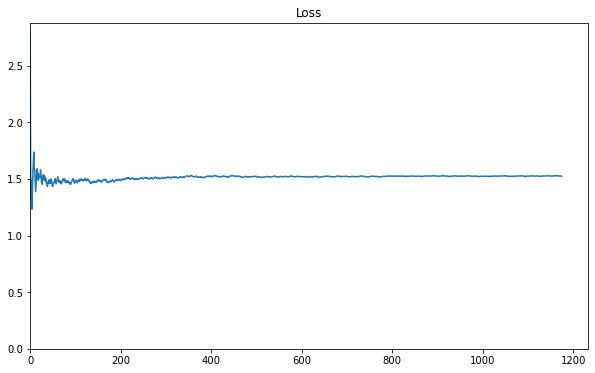

In [6]:
plt.title("Loss")
plt.plot(env.metric_history)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

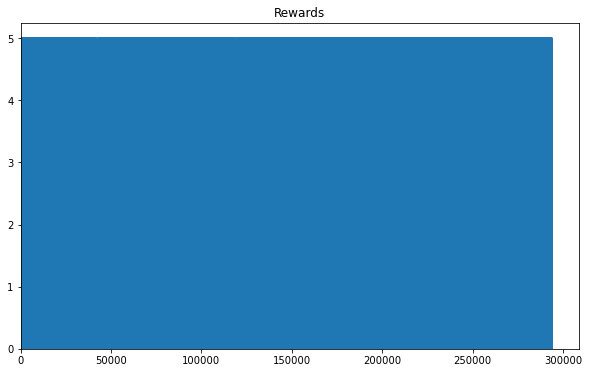

In [7]:
plt.title("Rewards")
plt.plot(env.rewards)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

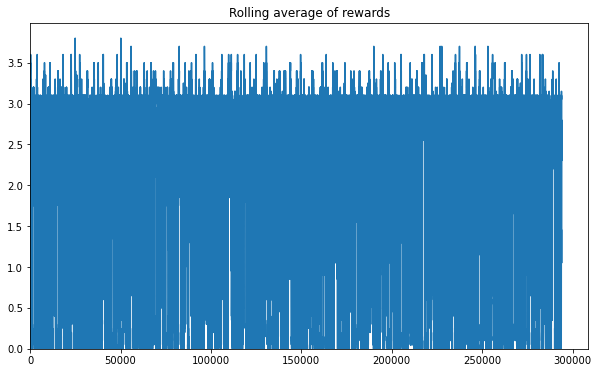

In [8]:
N = 20

plt.title("Rolling average of rewards")
plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

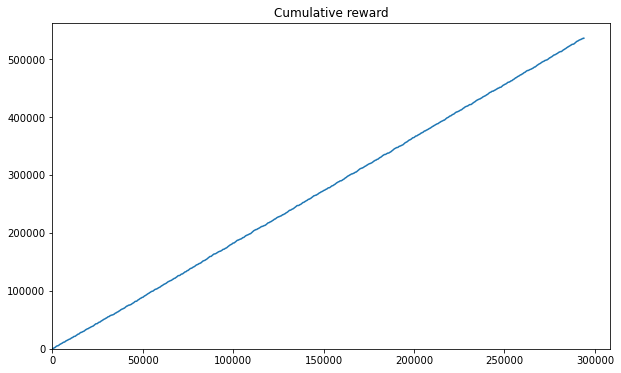

In [9]:
plt.title("Cumulative reward")
plt.plot(np.cumsum(env.rewards))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

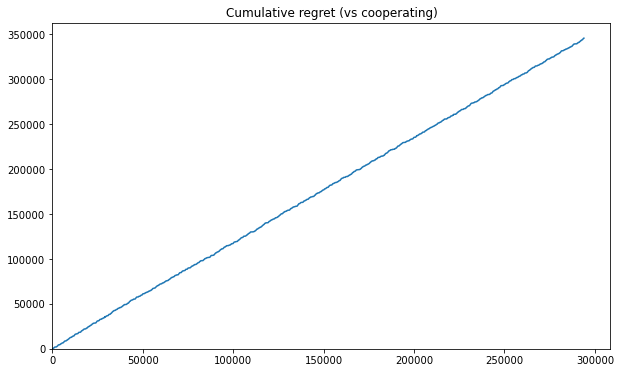

In [10]:
plt.title("Cumulative regret (vs cooperating)")
plt.plot(np.cumsum(3 - np.array(env.rewards)))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [ ]:
# torch.save(agent._q_network.state_dict(), "model.pt")

In [11]:
agent._q_network.eval()

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=16, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer4): Linear(in_features=100, out_features=2, bias=True)
)

In [12]:
tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=20, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [01:08<00:00, 14.03matches/s] 

TidemanAndChieruzzi2    829                  8.551839999999999   
Shubik                         804                  5.215062            
GenerousTFT                    804                  5.746441999999999   
GraaskampAndKatzen        804                  6.577857000000001   
Grofman                        790                  5.034262            
Pavlov                         790                  5.858917000000001   
Black              776                  7.962327            
Borufsen                       772                  6.714457            
Champion                       770                  30.468237999999996  
SteinAndRapoport               767                  19.136285000000004  
TTFT                           767                  5.634260999999999   
Grudger                        765                  6.234082000000001   
TFTT                           764                  5.721330000000001   
GradualTFT                     761                  63.41534600000001   
Wh